# 1. Extract Data

In [24]:
import os
print(os.listdir(path="..\\"))

['.gitkeep', 'ANN', 'Employee_attrition.csv', 'Housing.csv', 'Income&Expenditure.csv']


In [25]:
import pandas as pd
data=pd.read_csv("..\\Income&Expenditure.csv").iloc[:,2:]
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,Monday,Income,27700.0,Office,Online,27700.0,27700.00,206620.21
1,2,01-08-2023,Tuesday,Expenditure,720.9,Mobile Recharge,Online,26979.1,26979.10,205899.31
2,3,02-08-2023,Wednesday,None,0.0,None,None,26979.1,26979.10,205899.31
3,4,03-08-2023,Thursday,None,0.0,None,None,26979.1,26979.10,205899.31
4,5,04-08-2023,Friday,None,0.0,None,None,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,Wednesday,Income,27700.0,Office,Online,27700.0,160080.37,339000.58
265,256,01-02-2024,Thursday,None,0.0,None,None,27700.0,160080.37,339000.58
266,257,02-02-2024,Friday,None,0.0,None,None,27700.0,160080.37,339000.58
267,258,03-02-2024,Saturday,Expenditure,8000.0,NaN,Cash,19700.0,152080.37,331000.58


# 2. EDA

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial Number      269 non-null    int64  
 1   Date               269 non-null    object 
 2   Day                269 non-null    object 
 3   IncExp Status      269 non-null    object 
 4   Rupees             269 non-null    float64
 5   Pupose of IncExp   267 non-null    object 
 6   Payment mode       269 non-null    object 
 7   Monthly Saving     269 non-null    float64
 8   Cumulative Saving  269 non-null    float64
 9   Total Balance      269 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 21.1+ KB


In [27]:
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     2
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [28]:
data["Pupose of IncExp"].fillna("None",inplace=True)
data.isnull().sum()

Serial Number        0
Date                 0
Day                  0
IncExp Status        0
Rupees               0
Pupose of IncExp     0
Payment mode         0
Monthly Saving       0
Cumulative Saving    0
Total Balance        0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def f(i):
    data[i]=le.fit_transform(data[i])
for i in list(data.columns[data.dtypes=="object"]):
    if i != "Date":
        f(i)
data

,Serial Number,Date,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving,Cumulative Saving,Total Balance
0,1,31-07-2023,1,1,27700.0,29,2,27700.0,27700.00,206620.21
1,2,01-08-2023,5,0,720.9,22,2,26979.1,26979.10,205899.31
2,3,02-08-2023,6,2,0.0,28,1,26979.1,26979.10,205899.31
3,4,03-08-2023,4,2,0.0,28,1,26979.1,26979.10,205899.31
4,5,04-08-2023,0,2,0.0,28,1,26979.1,26979.10,205899.31
...,...,...,...,...,...,...,...,...,...,...
264,255,31-01-2024,6,1,27700.0,29,2,27700.0,160080.37,339000.58
265,256,01-02-2024,4,2,0.0,28,1,27700.0,160080.37,339000.58
266,257,02-02-2024,0,2,0.0,28,1,27700.0,160080.37,339000.58
267,258,03-02-2024,2,0,8000.0,28,0,19700.0,152080.37,331000.58


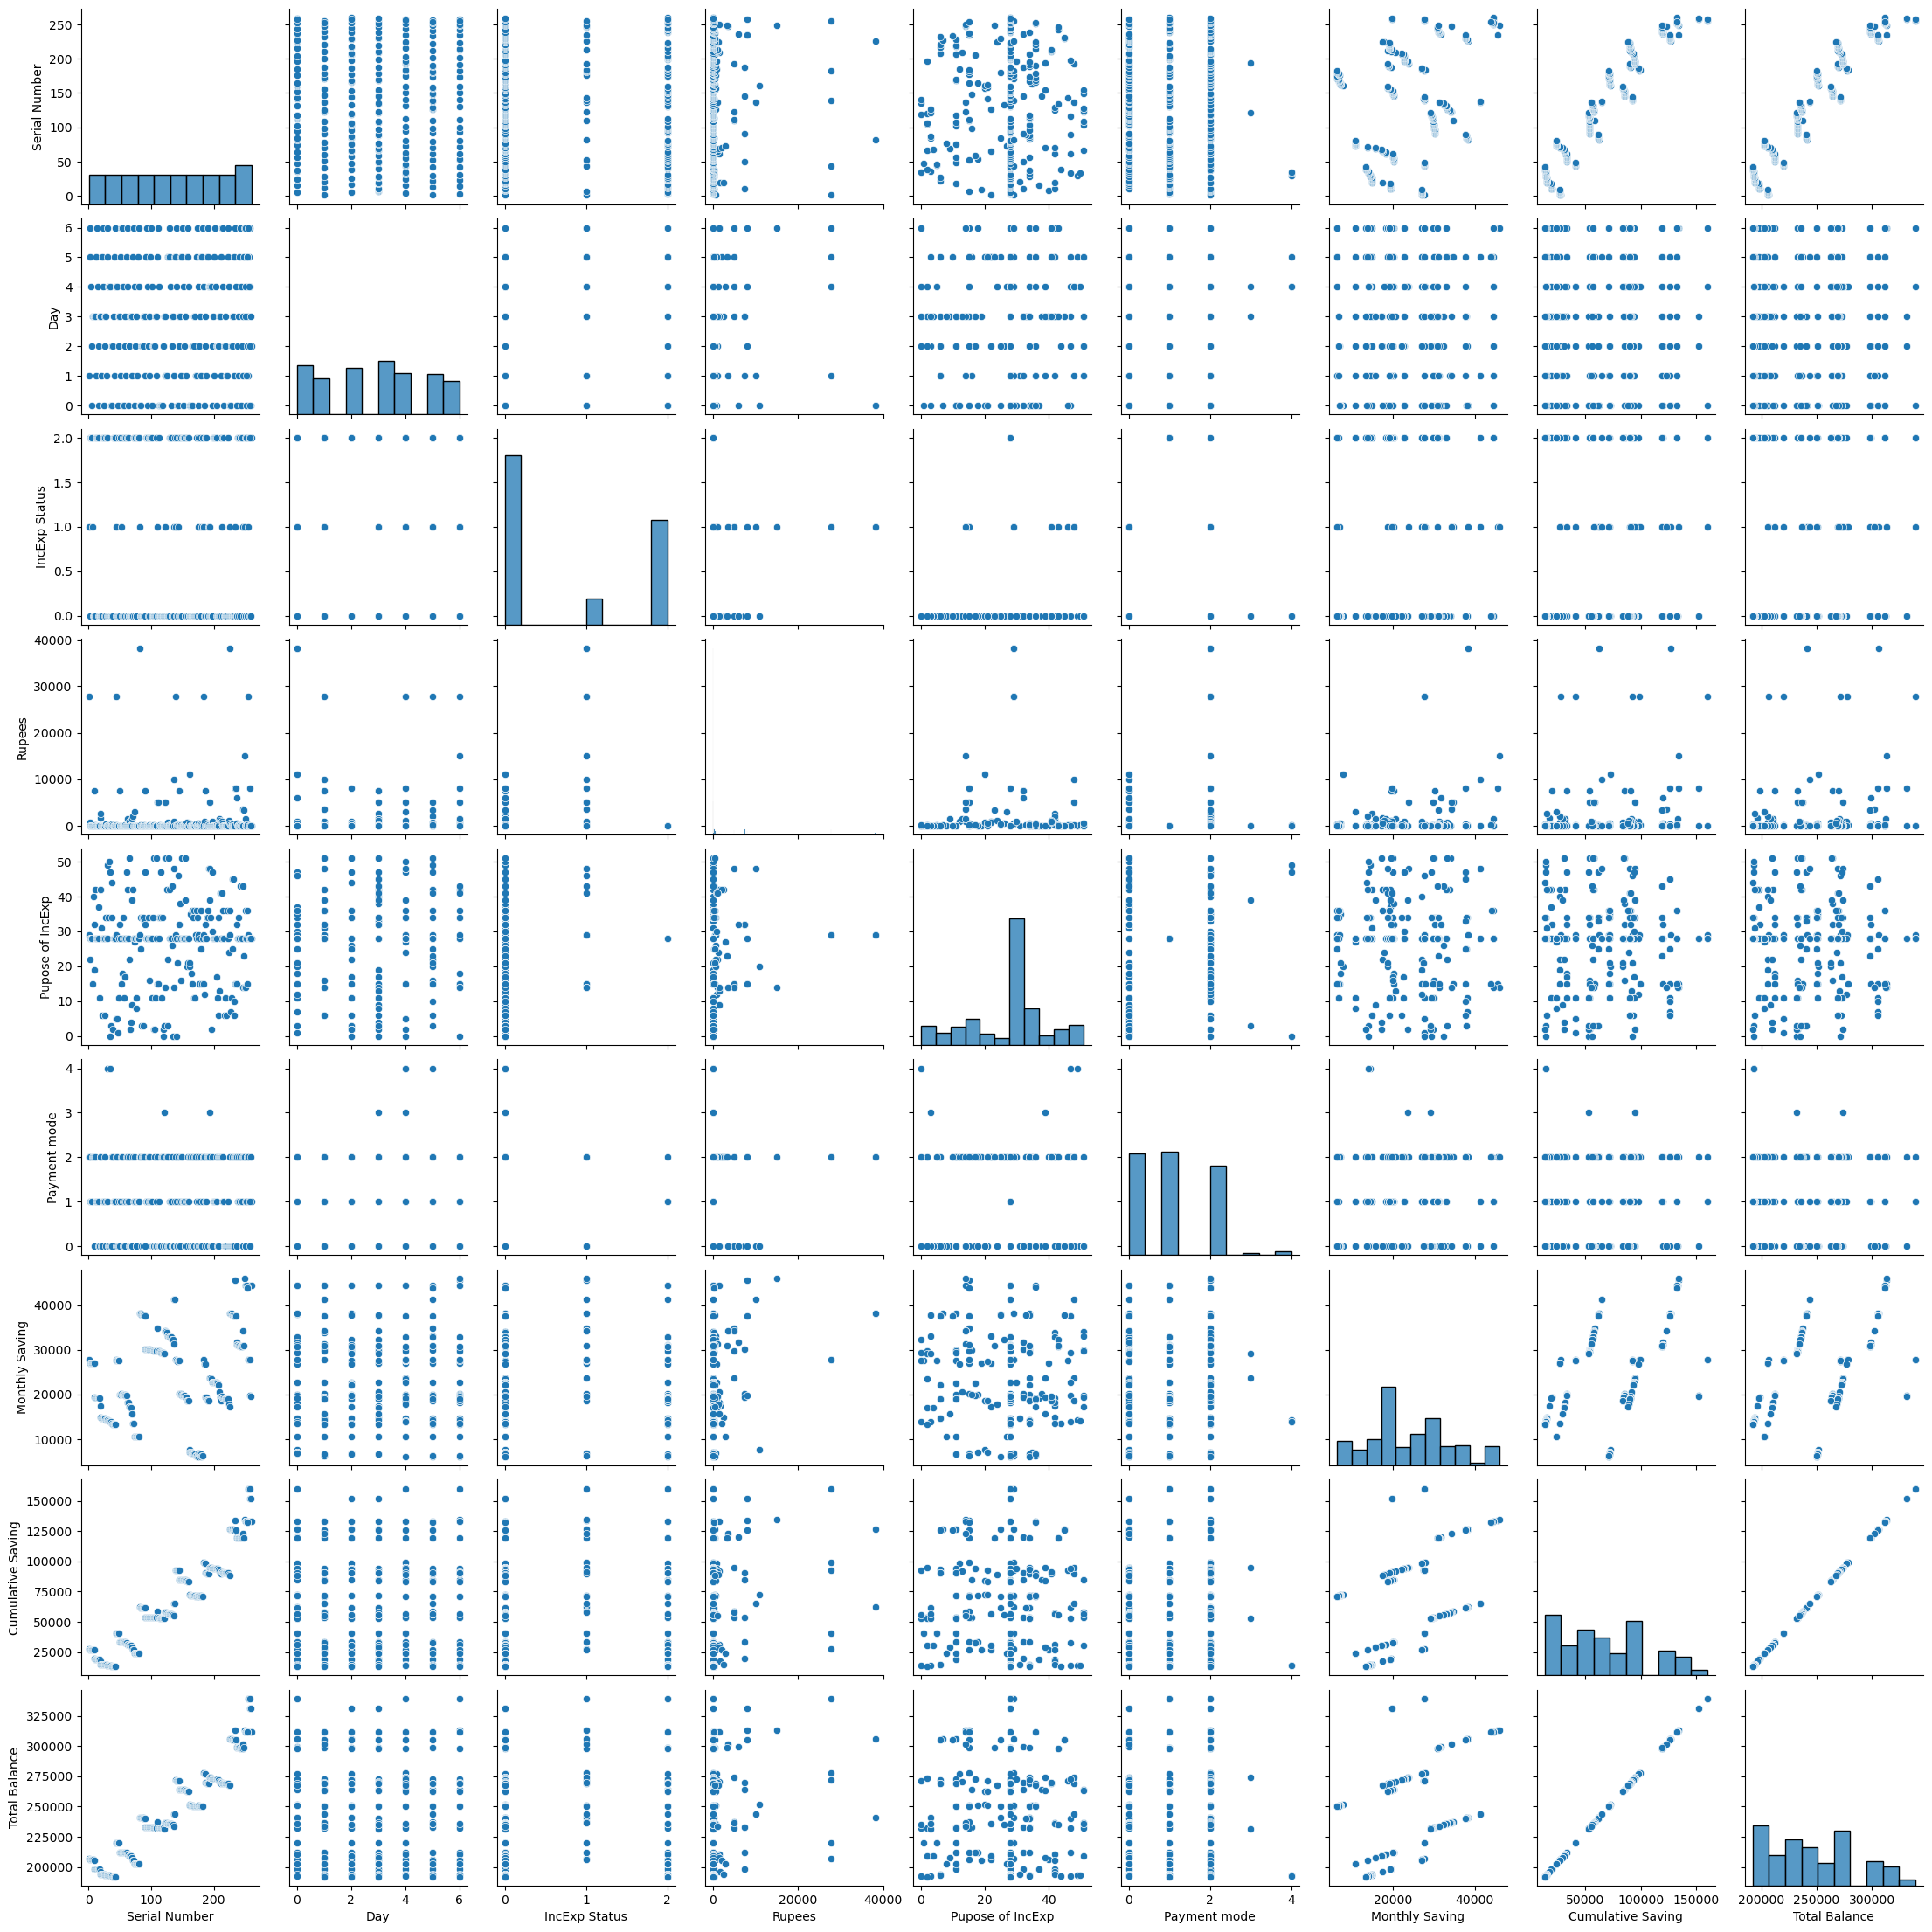

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(data)
plt.show()

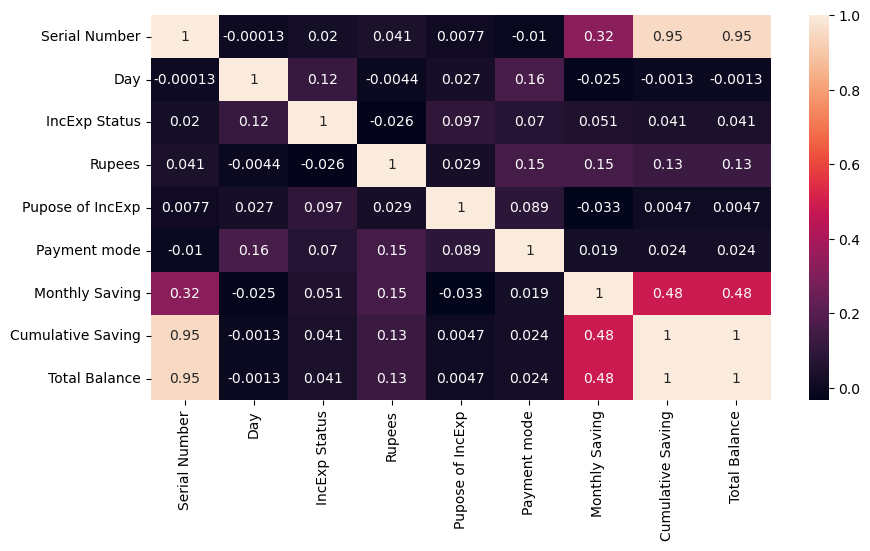

In [31]:
plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [32]:
x=data.iloc[:,2:-2]
y=data.iloc[:,-1]
x

,Day,IncExp Status,Rupees,Pupose of IncExp,Payment mode,Monthly Saving
0,1,1,27700.0,29,2,27700.0
1,5,0,720.9,22,2,26979.1
2,6,2,0.0,28,1,26979.1
3,4,2,0.0,28,1,26979.1
4,0,2,0.0,28,1,26979.1
...,...,...,...,...,...,...
264,6,1,27700.0,29,2,27700.0
265,4,2,0.0,28,1,27700.0
266,0,2,0.0,28,1,27700.0
267,2,0,8000.0,28,0,19700.0


In [33]:
y

0      206620.21
1      205899.31
2      205899.31
3      205899.31
4      205899.31
         ...    
264    339000.58
265    339000.58
266    339000.58
267    331000.58
268    330920.58
Name: Total Balance, Length: 269, dtype: float64

# 3. Feature Extraction

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm_x=MinMaxScaler(feature_range=(0,100000))
mm_y=MinMaxScaler(feature_range=(0,100000))

x_train=mm_x.fit_transform(x_train)
x_test=mm_x.transform(x_test)

y_train = mm_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = mm_y.transform(y_test.values.reshape(-1, 1))



# 4. ANN Layers

In [37]:
from tensorflow import keras
model=keras.Sequential()

In [38]:
model.add(keras.layers.Dense(units=20,activation='relu'))
model.add(keras.layers.Dense(units=5,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='linear'))

In [39]:
model.compile(optimizer='adam',loss='mse',metrics=["mse"])

# 5. Model Build

In [40]:
model.fit(x_train,y_train,epochs=1000,batch_size=32)

Epoch 1/1000


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1571499648.0000 - mse: 1571499648.0000
Epoch 2/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1634866944.0000 - mse: 1634866944.0000 
Epoch 3/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1374583680.0000 - mse: 1374583680.0000
Epoch 4/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1444366592.0000 - mse: 1444366592.0000
Epoch 5/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1287505920.0000 - mse: 1287506048.00000
Epoch 6/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 967604224.0000 - mse: 967604224.0000
Epoch 7/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 873089856.0000 - mse: 873089856.0000
Epoch 8/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 770342656.0000 - mse: 770342656.0000
Epoch 9/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 771480704.0000 - mse: 771480704.0000
Epoch 10/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 629918400.0000 - mse: 629918400.0000
Epoch 11/1000
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/s

In [41]:
y_pred=model.predict(x_test)
y_pred


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ 17570.451 ],
       [ 30883.887 ],
       [ 58021.86  ],
       [ 19596.5   ],
       [ 64454.11  ],
       [ 86491.78  ],
       [ 20072.691 ],
       [ 51036.17  ],
       [  8342.126 ],
       [ 74845.3   ],
       [ 43288.027 ],
       [ 18502.549 ],
       [129933.96  ],
       [ 23666.004 ],
       [ 46319.312 ],
       [ 35636.305 ],
       [ 40132.055 ],
       [ 26072.9   ],
       [ 32404.406 ],
       [ 21063.12  ],
       [ 71133.31  ],
       [ 30363.854 ],
       [ 16969.04  ],
       [ 12833.442 ],
       [ 34483.836 ],
       [ 27539.572 ],
       [ 37943.25  ],
       [ 48467.85  ],
       [  9569.086 ],
       [ 28157.309 ],
       [ 75050.35  ],
       [ 22708.91  ],
       [ 46576.22  ],
       [ 48181.668 ],
       [ 63954.21  ],
       [ 13108.614 ],
       [ 33558.133 ],
       [ 21490.63  ],
       [ 31070.799 ],
       [ 36179.477 ],
       [ 73335.43  ],
       [ 50344.383 ],
       [ 57623.633 ],
       [ 39097.883 ],
       [ 38175.742 ],
       [ 2

In [42]:
zip(y_test,y_pred)

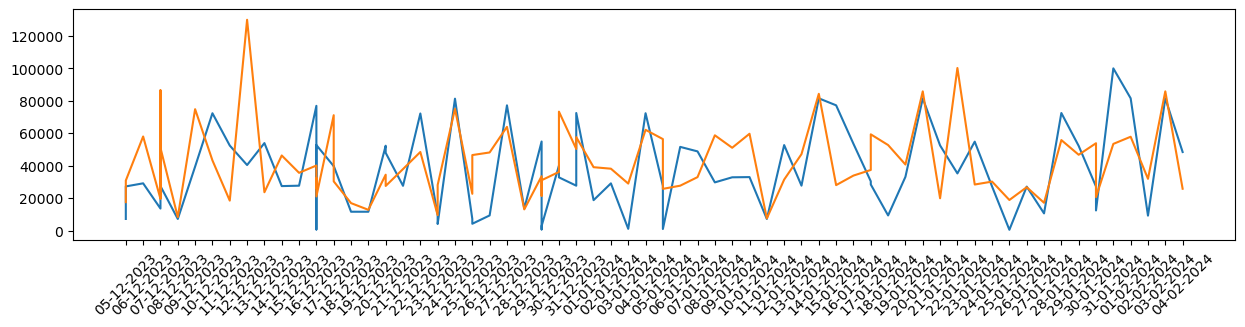

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,3])
plt.xticks(rotation=45)
#plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_test,'o',c="r")
#plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_pred,'o',c="y")

plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_test)
plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_pred)

plt.show()

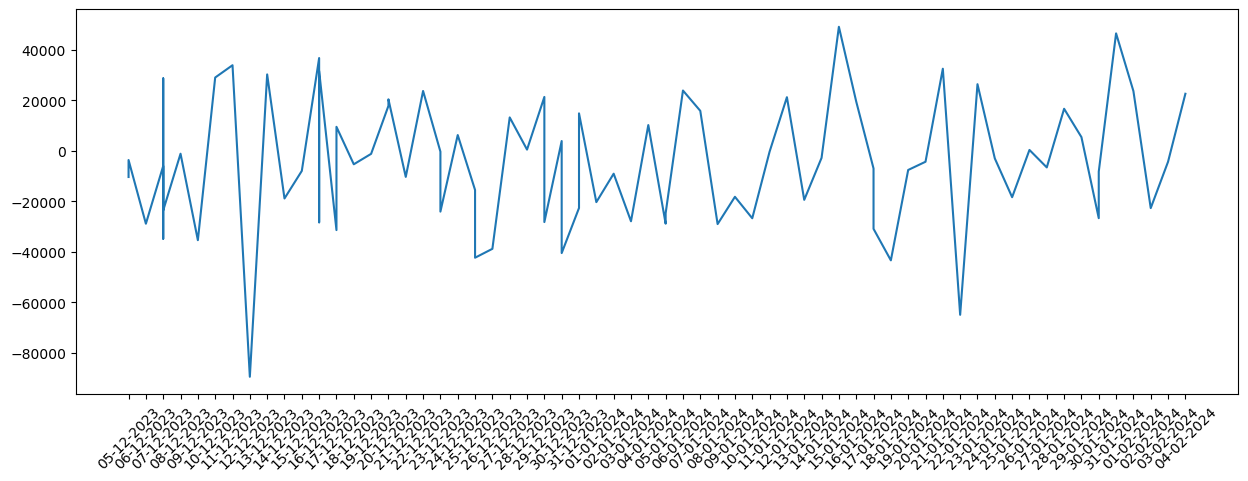

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
plt.xticks(rotation=45)
plt.plot(data["Date"].iloc[len(data["Date"])-len(y_test):],y_test-y_pred)
plt.show()



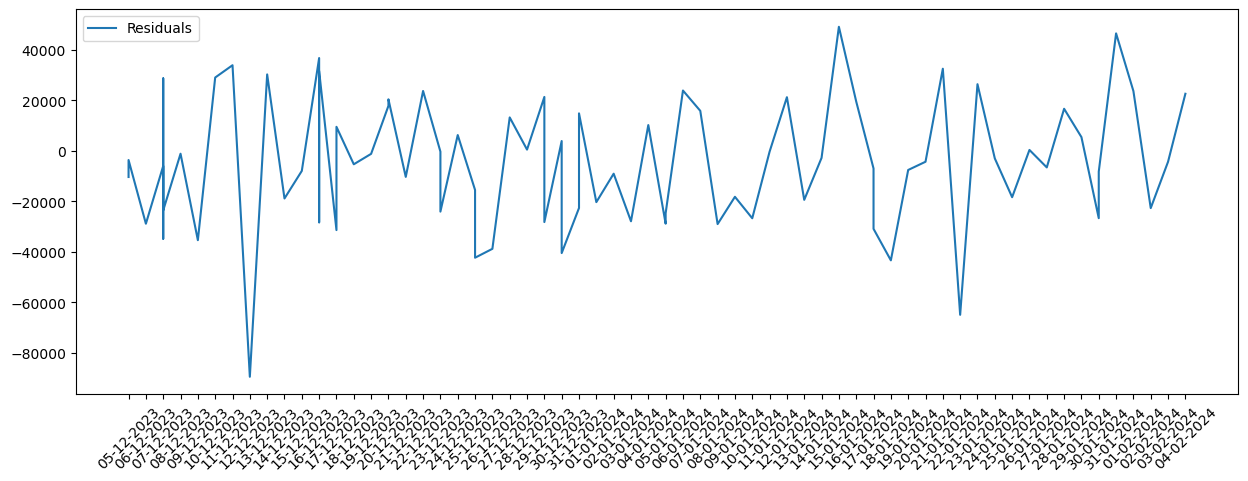

In [45]:
plt.figure(figsize=[15, 5])
plt.xticks(rotation=45)
plt.plot(data["Date"].iloc[len(data["Date"]) - len(y_test):], y_test-y_pred, label="Residuals")
plt.legend()
plt.show()